# Monte Carlo Method for Integration
---
## Table of Content:
* [Importing Required Tools](#first-bullet)
* [Purpose](#second-bullet)
* [Procedure](#third-bullet)
* [Integrating for Multiple Quantity of Points](#fourth-bullet)

## Importing Required Tools  <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Purpose <a class="anchor" id="second-bullet"></a>

The purpose of this exercise is to find an area between two curves by using Monte Carlo Method. The two curves that will be used are:
$$f(x) = \frac{sin(x^2)}{x}$$
$$g(x) = -sin(x)$$

The area will be determined for: $$x = (0,3]$$

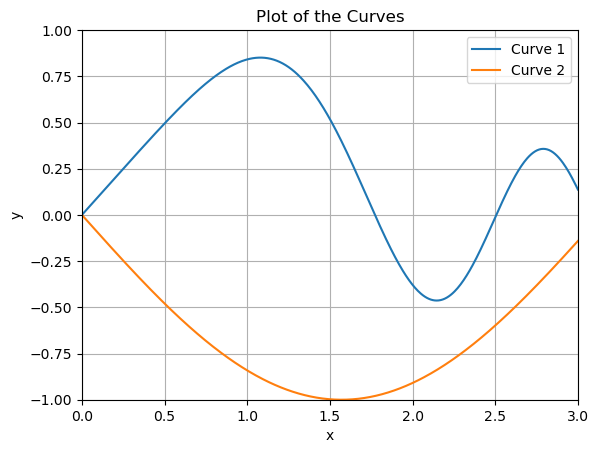

In [2]:
# Graphing the two curves in the same figure
# x-axis values
x = np.linspace(0,3, num = 500)[1:]
x2 = np.square(x)
# y-axis values
f_x = np.divide(np.sin(x2), x)
g_x = -np.sin(x)
# plotting the curves
plt.plot(x, f_x, label = "Curve 1")
plt.plot(x, g_x, label = "Curve 2")

plt.xlim(0,3)
plt.ylim(-1,1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Curves')
plt.legend()
plt.grid()
plt.show()

## Procedure <a class="anchor" id="third-bullet"></a>

The procedure will be as follow:
1. A huge number of points will need to be generated between $x = [0,3]$ and $y = [-1,1]$.
2. The area between the curves will be calculated by using the ratio of the number of points inside the curves to the total number of points multiplied by the total area of the figure.

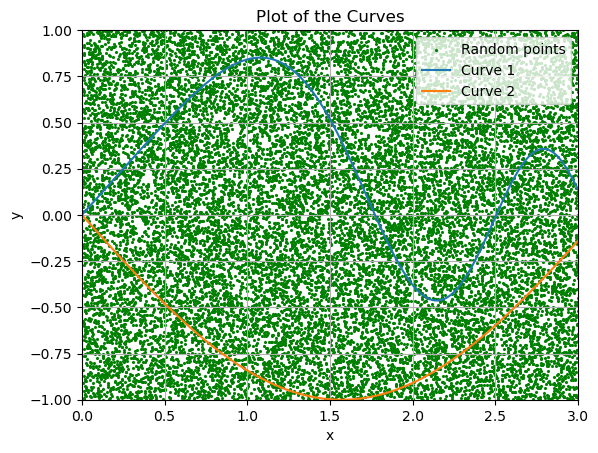

In [3]:
# Generating n number of points in x and y
n = 20000 # Total number of points
x_r = np.random.uniform(x[0], 3, n)
y_r = np.random.uniform(-1, 1, n)

# Plotting the random points
plt.scatter(x_r, y_r, label = 'Random points', color = 'green', 
            marker = '*',s = 2)
plt.plot(x, f_x, label = "Curve 1")
plt.plot(x, g_x, label = "Curve 2")

plt.xlim(0,3)
plt.ylim(-1,1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Curves')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Counting the number of points located between the curves
i = 0 # Element count for x_r and y_r arrays
N = 0 # Number of points between the curves
x_i = [] # x and y array to save the points between the curves
y_i = []
while i < n:
    a = y_r[i]
    b = np.divide(np.sin(np.square(x_r[i])), x_r[i])
    c = -np.sin(x_r[i])
    if a < b and a > c:
        x_i.append(x_r[i])
        y_i.append(a)
        N += 1
    i += 1
print('The number of points between the curves =', str(N))

The number of points between the curves = 9505


In [5]:
# Calculating the ratio
rat1 = N/n
# The area of the active graph is the length of y-axis times 
# the length of x-axis
rect_area = 6
# Area between the two curve is the total area times the ratio
curv_area = rect_area * rat1
print('The area between the curve is =', str(curv_area))

The area between the curve is = 2.8515


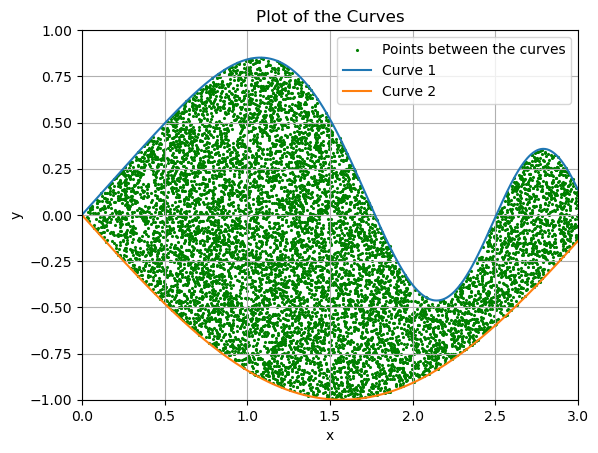

In [6]:
# Plotting the points between the curves
plt.scatter(x_i, y_i, label = 'Points between the curves', color = 'green', 
            marker = '*',s = 2)
plt.plot(x, f_x, label = "Curve 1")
plt.plot(x, g_x, label = "Curve 2")

plt.xlim(0,3)
plt.ylim(-1,1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Curves')
plt.legend()
plt.grid()
plt.show()

## Integrating for Multiple Quantity of Points <a class="anchor" id="fourth-bullet"></a>

In this part, different set of total number of points will be generated. A scatter plot for total number of random points vs the max, mean, and min area between the curves will be generated to visualize the difference in area for different total number of points. A plot for total number of points vs standard deviation will be generated to visualize the difference in standard deviation for different total number of points.

In [7]:
# Generating different max numbers
n_min = 500
n_max = 20000
n_num = 40
n = []
n = np.linspace(n_min,n_max, num = n_num)
c_area_max = []
c_area_min = []
c_area_mean = []
N_mean = []
i = 0
std_d = []
while i < n_num:
    i3 = 0
    n2 = 20
    N = []
    c_area = []
    while i3 < n2:
        x_r = np.random.uniform(x[0], 3, int(n[i]))
        y_r = np.random.uniform(-1, 1, int(n[i]))
        i2 = 0 # Element count for x_r and y_r arrays
        N.append(0)
        while i2 < n[i]:
            a = y_r[i2]
            b = np.divide(np.sin(np.square(x_r[i2])), x_r[i2])
            c = -np.sin(x_r[i2])
            if a < b and a > c:
                N[i3] += 1
            i2 += 1
        c_area.append(rect_area * N[i3] / n[i])
        i3 += 1
    N_mean.append(np.mean(N))
    rat1 = N_mean[i]/n[i]
    c_area_mean.append(rect_area * rat1)
    rat2 = max(N)/n[i]
    c_area_max.append(rect_area * rat2)
    rat3 = min(N)/n[i]
    c_area_min.append(rect_area * rat3)
    std_d.append(np.sqrt(np.sum(np.square(np.array(c_area)-c_area_mean[i]))/(n2-1)))
    i += 1

df = []
df = pd.DataFrame(data={'Total Random Points': n, 
                        'Mean Area Between the Curves': c_area_mean,
                        'Max Area Between the Curves': c_area_max,
                        'Min Area Between the Curvse': c_area_min,
                        'Standard Deviation': std_d})
df

,Total Random Points,Mean Area Between the Curves,Max Area Between the Curves,Min Area Between the Curvse,Standard Deviation
0,500.0,2.847000,3.048000,2.496000,0.131273
1,1000.0,2.814600,2.982000,2.688000,0.086114
2,1500.0,2.832800,2.952000,2.744000,0.057126
3,2000.0,2.848500,2.931000,2.754000,0.049597
4,2500.0,2.809440,2.918400,2.659200,0.071291
5,3000.0,2.823300,2.900000,2.748000,0.050789
6,3500.0,2.828400,2.921143,2.736000,0.050768
7,4000.0,2.837250,2.935500,2.773500,0.047203
8,4500.0,2.829267,2.869333,2.793333,0.021514
9,5000.0,2.838600,2.970000,2.748000,0.046915


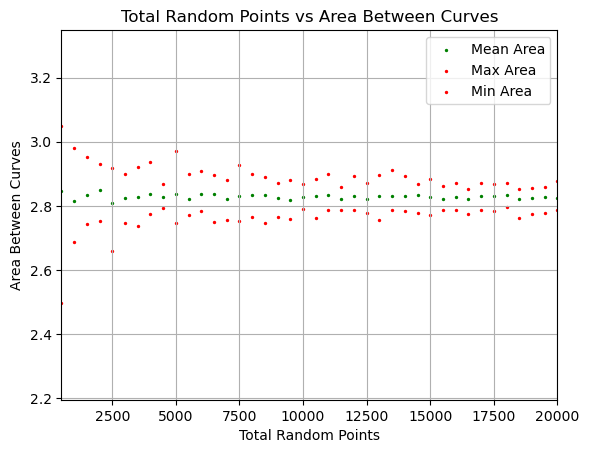

In [8]:
plt.scatter(n,c_area_mean,label='Mean Area',color='green',s=2)
plt.scatter(n,c_area_max,label='Max Area',color='red',s=2)
plt.scatter(n,c_area_min,label='Min Area',color='red',s=2)
plt.xlim(n_min,n_max)
plt.ylim(min(c_area_min)-0.3,max(c_area_max)+0.3)

plt.xlabel('Total Random Points')
plt.ylabel('Area Between Curves')
plt.title('Total Random Points vs Area Between Curves')
plt.legend()
plt.grid()
plt.show()

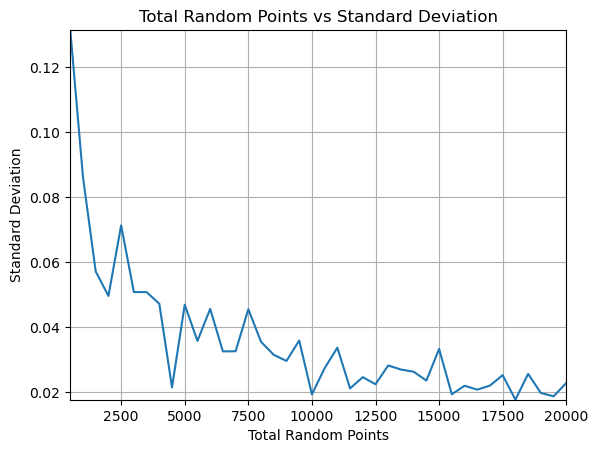

In [9]:
plt.plot(n,std_d)
plt.xlim(n_min,n_max)
plt.ylim(min(std_d),max(std_d))

plt.xlabel('Total Random Points')
plt.ylabel('Standard Deviation')
plt.title('Total Random Points vs Standard Deviation')

plt.grid()
plt.show()